In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

sns.set_theme()

In [303]:
adult = pd.read_csv('adult.data', sep=',')

In [304]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [305]:
adult.drop(['education'], axis=1, inplace=True)

Here we drop the column called education because we can see that the next column of education-num represents same thing. The only difference is that education-num represents the corresponding education inform of numbers 

In [306]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  target          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


Here, age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week are the continous values and workclass, education, marital-status, occupation, relationship, race, sex and native-country are non-continous values and income-range is the value that we have to predict.

In [307]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From the above data we can see that fnlwgt, capital-gain, capital-loss has a very large range. Performin on these data sets will make our model to take these features as important one and give full focus on them so we will have to scale them and also encode those non-continous columns to continous.

In [265]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

We can clearly see that we have no missing values in our data set.

First let's see how many people have income more than 50k and how many people have less than it.

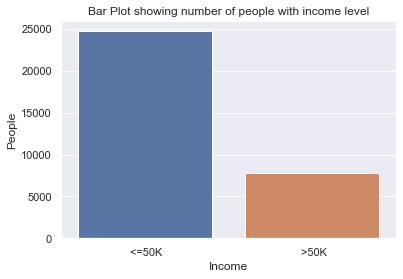

In [308]:
sns.countplot(x='target' , data = adult)
plt.title('Bar Plot showing number of people with income level')
plt.xlabel('Income')
plt.ylabel('People')
plt.show()

We can clearly see that it is imbalenced. We have like around 25000 of samples that have income beow 50K and around 7000 of samples that have income above 50K. The algorithm may get biased towards below 50K income ouput.   

let's see with respect to sex

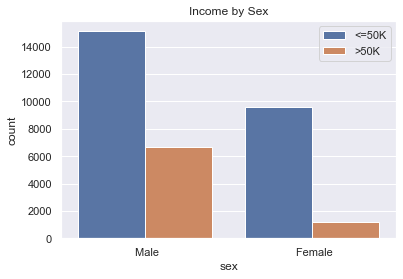

In [309]:
sns.countplot(data=adult, x='sex', hue='target')
plt.legend(['<=50K',">50K"])
plt.title('Income by Sex')
plt.show()

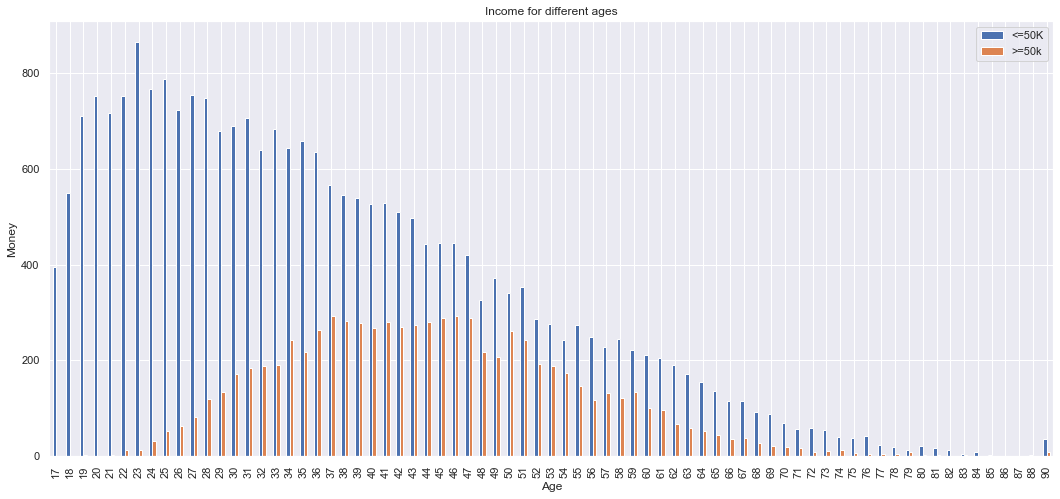

In [310]:

pd.crosstab(adult.age,adult.target).plot(kind="bar",figsize=(18,8))
plt.title('Income for different ages')
plt.legend(['<=50K',">=50k"])
plt.xlabel('Age')
plt.ylabel('Money')
plt.show()

Conclusion: The most number of age group that make over 50K seems to be from 34 to 51 and the yonger people mostly seems to make less than 50K the age group seems to be from 17.

In [311]:
df = adult.copy()

label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype=='object':
        df[col] = label_encoder.fit_transform(df[col])

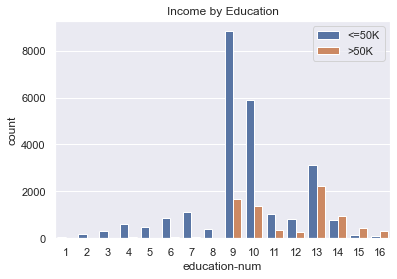

In [312]:
sns.countplot(data=adult, x='education-num', hue='target')
plt.legend(['<=50K',">50K"])
plt.title('Income by Education')
plt.show()

Conclusion: We can see that people with education-num over 9 has their yearly salary above 50K

In [313]:
df

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,9,4,1,3,4,1,0,0,20,39,0


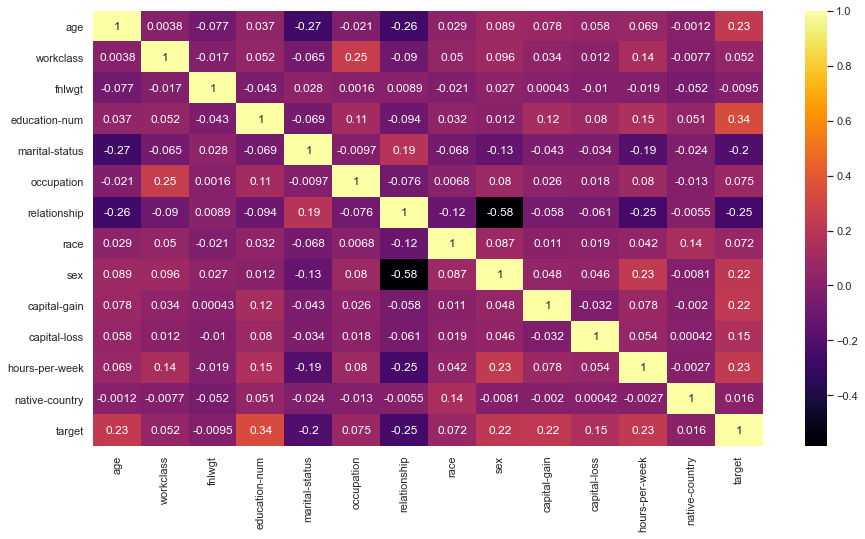

In [314]:
fig, ax = plt.subplots(figsize=(15,8))      
sns.heatmap(df.corr(),cmap='inferno',annot=True)
plt.show()

Here we can see that workclass, fnlwgt, race, native-country are poorly corelated to the target i.e. our prediction so we can drop them.

In [315]:
#df.drop(['workclass', 'race', 'native-country', 'fnlwgt'],axis=1 ,inplace = True)

# Without scaling and by using label transformer and then applying in different models and not dropping columns that have less corrrelation

In [316]:
X = df.iloc[:, :-1]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.2)

knear = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2)
logreg = LogisticRegression(max_iter=50000)
descisionclassifier = DecisionTreeClassifier(criterion='gini')
randomforest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5)


knear.fit(X_train, y_train)
logreg.fit(X_train, y_train)
descisionclassifier.fit(X_train, y_train)
randomforest.fit(X_train, y_train)

y_pred_knear = knear.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_decision = descisionclassifier.predict(X_test)
y_pred_random = randomforest.predict(X_test)

print('KNN')
print(accuracy_score(y_test, y_pred_knear))
print(confusion_matrix(y_test, y_pred_knear))

print('Logistic Regression')
print(accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

print('Decision Tree Classifier')
print(accuracy_score(y_test, y_pred_decision))
print(confusion_matrix(y_test, y_pred_decision))

print('Random Forest Classifier')
print(accuracy_score(y_test, y_pred_random))
print(confusion_matrix(y_test, y_pred_random))


KNN
0.7850452940273299
[[4754  164]
 [1236  359]]
Logistic Regression
0.7845846768002457
[[4654  264]
 [1139  456]]
Decision Tree Classifier
0.8068478427759865
[[4289  629]
 [ 629  966]]
Random Forest Classifier
0.846307385229541
[[4720  198]
 [ 803  792]]


# Without scaling and by using label transformer and then applying in different models droping some columns

In [328]:
df = adult.copy()

label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype=='object':
        df[col] = label_encoder.fit_transform(df[col])
        
df.drop(['workclass', 'race', 'native-country', 'fnlwgt'],axis=1 ,inplace = True)

In [329]:
X = df.iloc[:, :-1]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.2)

knear = KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2)
logreg = LogisticRegression(max_iter=50000)
descisionclassifier = DecisionTreeClassifier(criterion='gini')
randomforest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5)


knear.fit(X_train, y_train)
logreg.fit(X_train, y_train)
descisionclassifier.fit(X_train, y_train)
randomforest.fit(X_train, y_train)

y_pred_knear = knear.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_decision = descisionclassifier.predict(X_test)
y_pred_random = randomforest.predict(X_test)

print('KNN')
print(accuracy_score(y_test, y_pred_knear))
print(confusion_matrix(y_test, y_pred_knear))

print('Logistic Regression')
print(accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

print('Decision Tree Classifier')
print(accuracy_score(y_test, y_pred_decision))
print(confusion_matrix(y_test, y_pred_decision))

print('Random Forest Classifier')
print(accuracy_score(y_test, y_pred_random))
print(confusion_matrix(y_test, y_pred_random))


KNN
0.8446184553968985
[[4610  308]
 [ 704  891]]
Logistic Regression
0.81759557807462
[[4605  313]
 [ 875  720]]
Decision Tree Classifier
0.8160601873176724
[[4371  547]
 [ 651  944]]
Random Forest Classifier
0.8481498541378781
[[4712  206]
 [ 783  812]]


# By using robust scaling and by using one hot encoder transformer and then applying in different models

In [330]:
adult.drop(['workclass', 'race', 'native-country', 'fnlwgt'],axis=1 ,inplace = True)

In [331]:
X = adult.iloc[:, :-1]
y = adult.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, test_size=0.2)

In [332]:
num_col = [col for col in X_train.columns if X_train[col].dtypes!='O']
cat_col = [col for col in X_train.columns if X_train[col].dtypes=='O']

In [333]:
ct = ColumnTransformer([
    ('RobustScaler', RobustScaler(), num_col),
    ('OneHotEncoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_col)
], remainder='drop')

In [334]:
Logistic_Pipeline = Pipeline([
    ('Scaling and Encoding', ct), 
    ('Logistic Regression', LogisticRegression(max_iter=50000))
])

Logistic_Pipeline.fit(X_train, y_train)

print("Logistic Regression : ")
print("Accuracy : ", Logistic_Pipeline.score(X_test,y_test))

Logistic Regression : 
Accuracy :  0.84692154153232


In [335]:
KNN_Pipeline = Pipeline([
    ('Scaling and Encoding', ct), 
    ('K Nearest Neighbour', KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=2))
])

KNN_Pipeline.fit(X_train, y_train)

print("K Nearest Neighbour : ")
print("Accuracy : ", KNN_Pipeline.score(X_test,y_test))

K Nearest Neighbour : 
Accuracy :  0.8561338860740059


In [336]:
DescisionTree_Pipeline = Pipeline([
    ('Scaling and Encoding', ct), 
    ('Decision Tree', DecisionTreeClassifier(criterion='gini'))
])

DescisionTree_Pipeline.fit(X_train, y_train)

print("Decision Tree : ")
print("Accuracy : ", DescisionTree_Pipeline.score(X_test,y_test))

Decision Tree : 
Accuracy :  0.8157531091662829


In [337]:
Randomforest_Pipeline = Pipeline([
    ('Scaling and Encoding', ct), 
    ('K Nearest Neighbour', RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5))
])

Randomforest_Pipeline.fit(X_train, y_train)

print("Random Forest Classification: ")
print("Accuracy : ", Randomforest_Pipeline.score(X_test,y_test))

Random Forest Classification: 
Accuracy :  0.8455396898510671


# Final Conclusion

While we used raw data without scaling and without droping any of the features the accuracy og the model can be seen less compared to when we didn't use any scaling but dropped the columns with less correlations

 And then when we used scaling in the data and also dropped the features with less correlations we could find that our accuracy for K Nearest Algorithm and Logistic Regression went up but the accuracy for Decision Tree Claaifier and Random Forest Classifier reamined same. They remained same because these two algorithm didn't depend upon scaling of the features.